In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# 1. Load data
data = load_iris()
X, y = data.data, data.target

# 2. Initialize the Forest
# Important: oob_score=True must be set!
rf = RandomForestClassifier(n_estimators=100, 
                            oob_score=True, 
                            random_state=42)

# 3. Fit the model
rf.fit(X, y)

# 4. Access the OOB Score
print(f"OOB Score: {rf.oob_score_}")

OOB Score: 0.9533333333333334


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load Dataset (Standard UCI Diabetes Dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

X = df.drop('class', axis=1)
y = df['class']
print(df.isnull().sum())
# 2. Split into Training and Testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a PRUNED Decision Tree
pruned_dt = DecisionTreeClassifier(
    max_depth=3,             # Limit how deep the tree goes
    min_samples_split=10,    # A node must have 10 samples before it can split
    min_samples_leaf=5,      # A leaf must have at least 5 samples
    random_state=42
)

pruned_dt.fit(X_train, y_train)

# Check the new scores
print(f"Pruned Training Accuracy: {pruned_dt.score(X_train, y_train):.2f}")
print(f"Pruned Test Accuracy: {pruned_dt.score(X_test, y_test):.2f}")



preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
Pruned Training Accuracy: 0.78
Pruned Test Accuracy: 0.76


In [13]:
from sklearn.ensemble import RandomForestClassifier

# 1. Build a Random Forest
# We use 100 trees and enable oob_score
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Check Performance
rf_test_pred = rf_model.predict(X_test)

print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_test_pred):.2f}")
print(f"Random Forest OOB Score: {rf_model.oob_score_:.2f}")

Random Forest Test Accuracy: 0.72
Random Forest OOB Score: 0.75


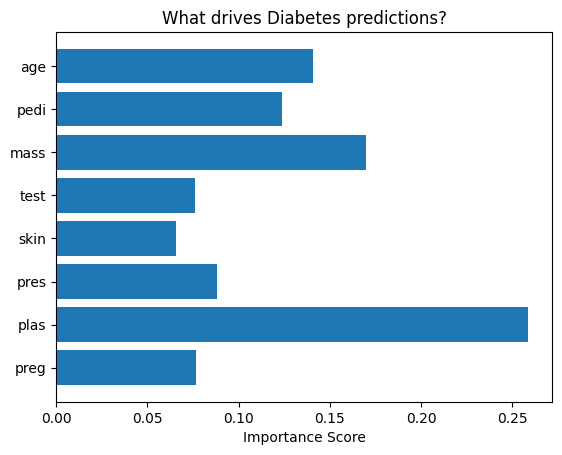

In [4]:
import matplotlib.pyplot as plt

# Get importance scores
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("What drives Diabetes predictions?")
plt.show()